In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
%matplotlib inline

conn = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [13]:
df = pd.read_sql_query('''
    SELECT director,production_budget,domestic_gross,worldwide_gross FROM movies.rt_movie_info
join rt_imdb_link
on rt_movie_info.id = rt_imdb_link.rtid
join tn_movie_budgets
on rt_imdb_link.title = tn_movie_budgets.movie
''', conn)

In [14]:
df

,director,production_budget,domestic_gross,worldwide_gross
0,Paul Bogart,"$120,000,000","$56,117,548","$167,849,187"
1,Paul Bogart,"$87,500,000","$154,696,080","$333,132,750"
2,,"$27,000,000","$4,476,235","$16,566,235"
3,William Friedkin,"$145,000,000","$68,671,925","$121,671,925"
4,Taylor Hackford,"$110,000,000","$47,398,413","$218,853,353"
5,,"$60,000,000","$26,873,932","$71,073,932"
6,George Hickenlooper,"$80,000,000","$128,200,012","$260,700,012"
7,Robert Ramirez,"$150,000,000","$206,459,076","$475,825,484"
8,Jake Kasdan,"$45,000,000","$82,931,301","$155,931,301"
9,Lynn Shelton,"$150,000,000","$205,343,774","$359,142,722"


In [15]:
df['production_budget']=df['production_budget'].str.replace(',','')
df['production_budget']=df['production_budget'].str.replace('$','')

In [16]:
df['domestic_gross']=df['domestic_gross'].str.replace(',','')
df['domestic_gross']=df['domestic_gross'].str.replace('$','')

In [17]:
df['worldwide_gross']=df['worldwide_gross'].str.replace(',','')
df['worldwide_gross']=df['worldwide_gross'].str.replace('$','')

In [18]:
df["production_budget"] = df.production_budget.astype(float)
df["domestic_gross"] = df.domestic_gross.astype(float)
df["worldwide_gross"] = df.worldwide_gross.astype(float)

In [19]:
df

,director,production_budget,domestic_gross,worldwide_gross
0,Paul Bogart,120000000.0,56117548.0,167849187.0
1,Paul Bogart,87500000.0,154696080.0,333132750.0
2,,27000000.0,4476235.0,16566235.0
3,William Friedkin,145000000.0,68671925.0,121671925.0
4,Taylor Hackford,110000000.0,47398413.0,218853353.0
5,,60000000.0,26873932.0,71073932.0
6,George Hickenlooper,80000000.0,128200012.0,260700012.0
7,Robert Ramirez,150000000.0,206459076.0,475825484.0
8,Jake Kasdan,45000000.0,82931301.0,155931301.0
9,Lynn Shelton,150000000.0,205343774.0,359142722.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   director           28 non-null     object 
 1   production_budget  28 non-null     float64
 2   domestic_gross     28 non-null     float64
 3   worldwide_gross    28 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.0+ KB


In [21]:
gross_by_director = df.groupby('director').sum().sort_values('worldwide_gross',ascending=False)

In [22]:
gross_by_director

,production_budget,domestic_gross,worldwide_gross
director,,,
Adrian Lyne,132000000.0,234280354.0,606836535.0
Paul Bogart,207500000.0,210813628.0,500981937.0
Robert Ramirez,150000000.0,206459076.0,475825484.0
Lynn Shelton,150000000.0,205343774.0,359142722.0
,143000000.0,144357047.0,285647047.0
George Hickenlooper,80000000.0,128200012.0,260700012.0
Taylor Hackford,110000000.0,47398413.0,218853353.0
Terry Gilliam,82000000.0,158119460.0,191558505.0
Melvin Frank,142000000.0,51535741.0,178735741.0


Text(0, 0.5, 'Worldwide box office gross ($M)')

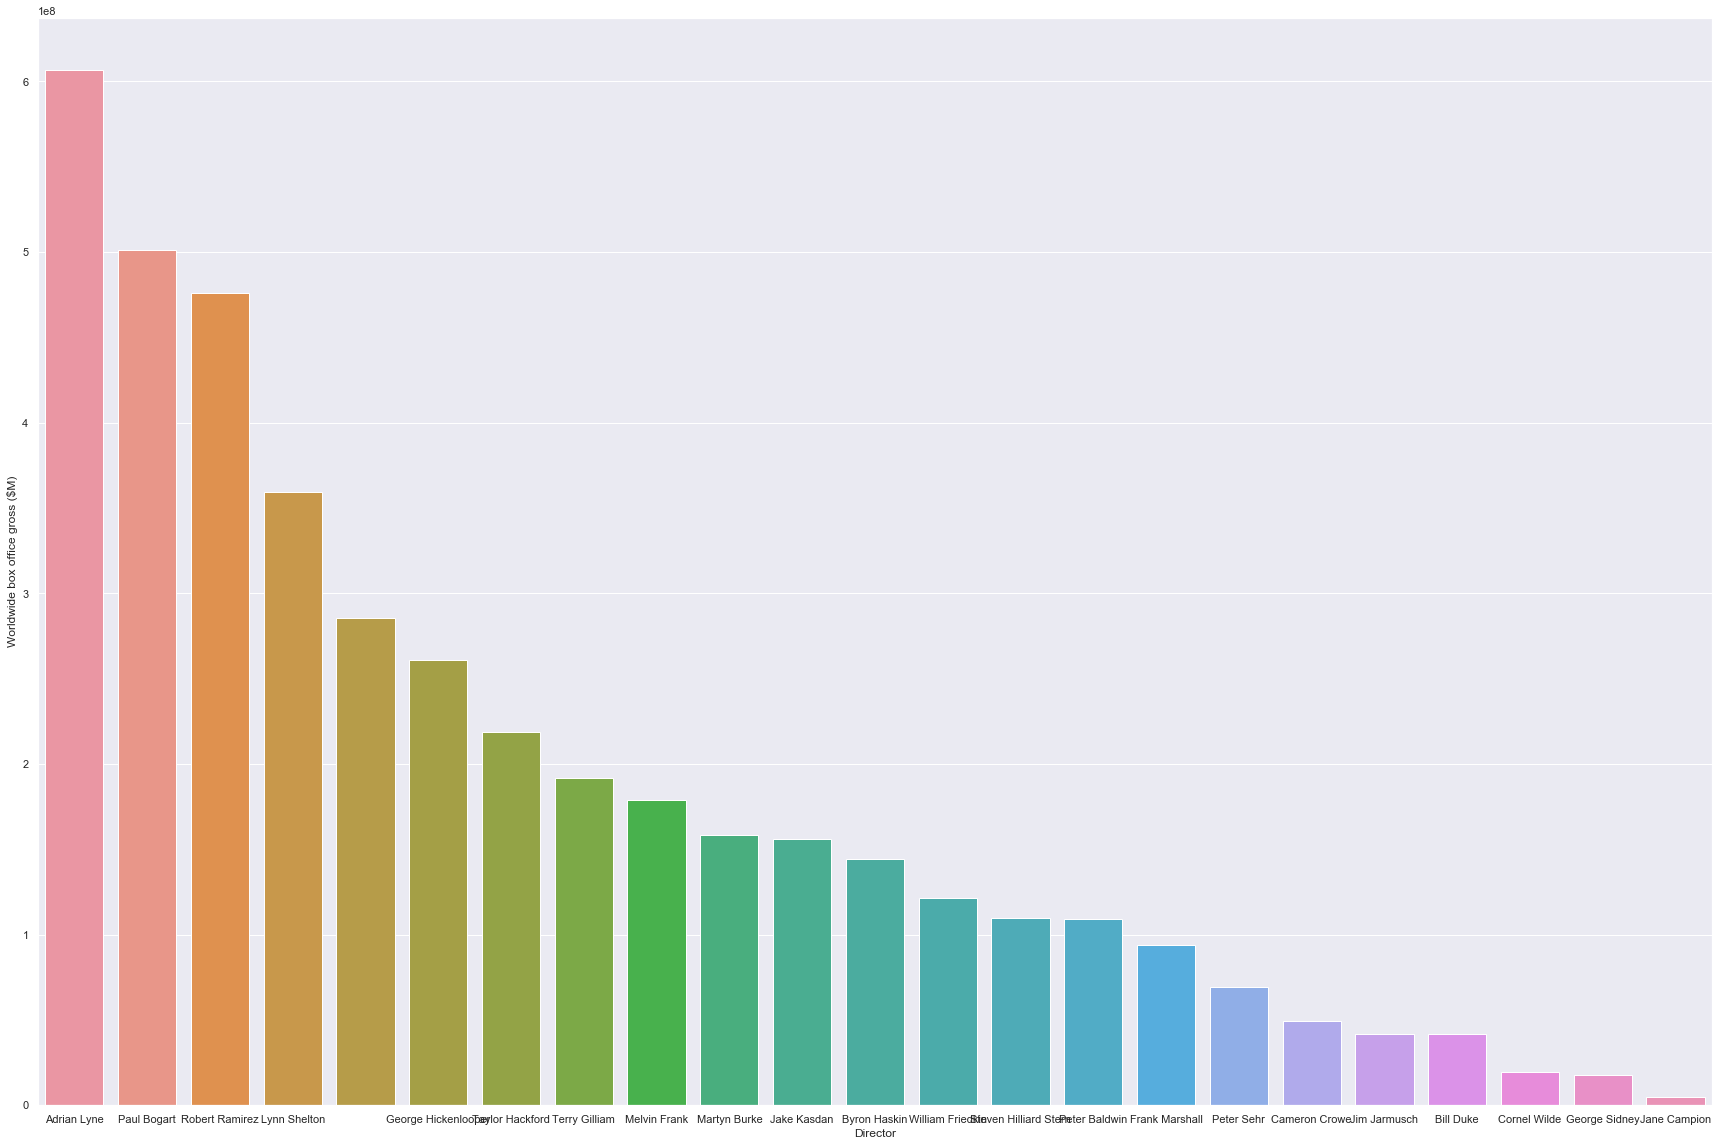

In [25]:
sns.barplot(gross_by_director.index,gross_by_director.worldwide_gross)
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
sns.set(rc={'figure.figsize':(30,20)})
plt.xlabel('Director')
plt.ylabel('Worldwide box office gross ($M)')

In [24]:
df['known_for_titles'].str.split(',',n=3,expand=True)

KeyError: 'known_for_titles'

In [ ]:
SELECT *
FROM
    movies.imdb_name_basics
join imdb_title_principals
on imdb_name_basics.nconst = imdb_title_principals.nconst

In [ ]:
SELECT *
FROM imdb_title_principals
JOIN imdb_title_crew
ON imdb_title_principals.tconst = imdb_title_crew.tconst 

In [ ]:
SELECT title,genre,director,writer,production_budget,domestic_gross,worldwide_gross FROM movies.rt_movie_info
join rt_imdb_link
on rt_movie_info.id = rt_imdb_link.rtid
join tn_movie_budgets
on rt_imdb_link.title = tn_movie_budgets.movie

In [29]:
df2=pd.read_sql('''Select primary_name,primary_profession,movie,production_budget,domestic_gross,worldwide_gross
From movies.imdb_title_crew
join imdb_name_basics
on imdb_name_basics.nconst = imdb_title_crew.directors
join imdb_title_basics
on imdb_title_basics.tconst = imdb_title_crew.tconst
join tn_movie_budgets
on imdb_title_basics.primary_title=tn_movie_budgets.movie
where primary_profession like "%director%"''',conn)

In [30]:
type('worldwide_gross')

str

In [31]:
df2['worldwide_gross']=df2['worldwide_gross'].str.replace(',','')
df2['worldwide_gross']=df2['worldwide_gross'].str.replace('$','')
df2['worldwide_gross'] = df2.worldwide_gross.astype(float)

In [32]:
df2['domestic_gross']=df2['domestic_gross'].str.replace(',','')
df2['domestic_gross']=df2['domestic_gross'].str.replace('$','')
df2['domestic_gross'] = df2.domestic_gross.astype(float)

In [33]:
g=df2[['primary_name','worldwide_gross','domestic_gross']]

In [34]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_name     3168 non-null   object 
 1   worldwide_gross  3168 non-null   float64
 2   domestic_gross   3168 non-null   float64
dtypes: float64(2), object(1)
memory usage: 74.4+ KB


In [35]:
gbd = g.groupby('primary_name').sum().sort_values('worldwide_gross',ascending=False).head(20)

In [36]:
gbd

,worldwide_gross,domestic_gross
primary_name,,
Christopher Nolan,3.086180e+09,1.118801e+09
James Wan,3.083488e+09,8.794781e+08
Joss Whedon,2.992085e+09,1.128220e+09
Peter Jackson,2.922948e+09,8.164902e+08
Michael Bay,2.911998e+09,7.778736e+08
Atsushi Wada,2.776345e+09,7.605076e+08
Francis Lawrence,2.543192e+09,1.149112e+09
Zack Snyder,2.420920e+09,9.424978e+08
Bryan Singer,2.383073e+09,6.708550e+08


Text(0.5, 1.0, 'Top 20 Most Successful Directors')

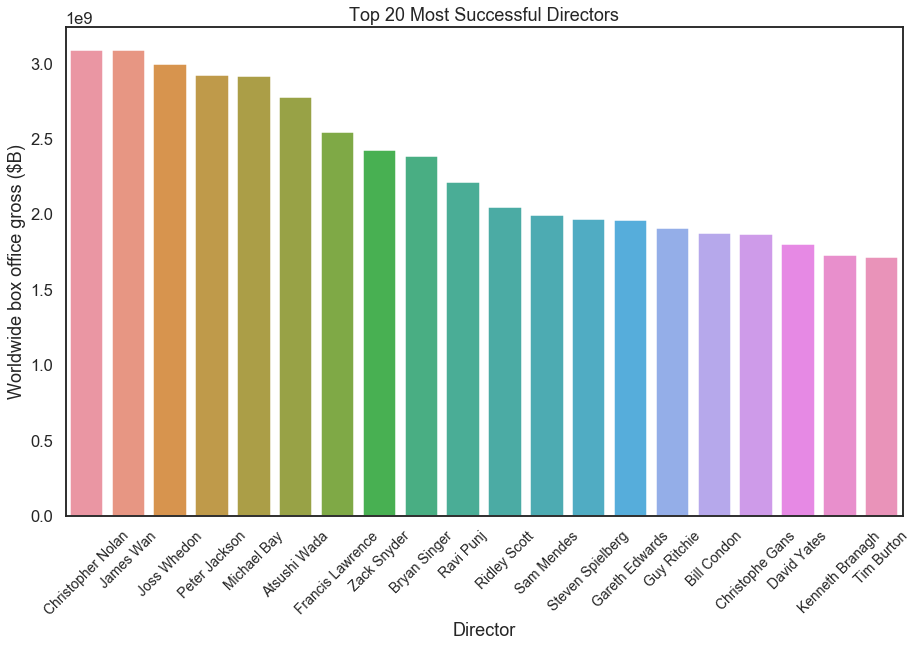

In [79]:
plt.figure(figsize=(15, 9))
sns.barplot(gbd.index,gbd.worldwide_gross)
sns.set_style("white")
sns.set_context("talk")
plt.xlabel('Director')
plt.ylabel('Worldwide box office gross ($B)')
plt.xticks(rotation=45,fontsize = 14)
plt.title('Top 20 Most Successful Directors')

In [38]:
new = df2['primary_profession'].str.split(',',n=3,expand=True)

In [ ]:
df2['Primary Profession'] = new[0] 
df2['Secondary Profession'] = new[1] 
df2['Tertiary Profession'] = new[2] 

In [ ]:
df2

In [ ]:
_______________________________________________
_______________________________________________

In [ ]:
df3=pd.read_sql('''Select primary_name,primary_profession,movie,production_budget,domestic_gross,worldwide_gross
From movies.imdb_title_crew
join imdb_name_basics
on imdb_name_basics.nconst = imdb_title_crew.directors
join imdb_title_basics
on imdb_title_basics.tconst = imdb_title_crew.tconst
join tn_movie_budgets
on imdb_title_basics.primary_title=tn_movie_budgets.movie
where primary_profession like "%actor%"''',conn)

In [ ]:
new3 = df3['primary_profession'].str.split(',',n=3,expand=True)

In [ ]:
df3['Primary Profession'] = new[0] 
df3['Secondary Profession'] = new[1] 
df3['Tertiary Profession'] = new[2] 

In [ ]:
df3

In [ ]:
df3['worldwide_gross']=df3['worldwide_gross'].str.replace(',','')
df3['worldwide_gross']=df3['worldwide_gross'].str.replace('$','')
df3['worldwide_gross'] = df3.worldwide_gross.astype(float)

In [ ]:
a=df3[['primary_name','worldwide_gross','domestic_gross','Primary Profession']]

In [ ]:
a

In [ ]:
a.loc[a["primary_name"] == 'Ron Howard']

In [ ]:
b= a.loc[a['Primary Profession'] == 'actor']

In [ ]:
b

In [ ]:
gba = b.groupby('primary_name').sum().sort_values('worldwide_gross',ascending=False).head(20)

In [ ]:
gba

In [48]:
df4 = pd.read_sql("""SELECT primary_name,movie,worldwide_gross FROM movies.imdb_name_basics
join imdb_title_principals
on imdb_name_basics.nconst = imdb_title_principals.nconst
join imdb_title_basics
on imdb_title_basics.tconst = imdb_title_principals.tconst
join tn_movie_budgets
on imdb_title_basics.primary_title=tn_movie_budgets.movie
where category = 'actress' OR category = 'actor'""", conn)

OperationalError: MySQL Connection not available.

In [49]:
df4

,primary_name,movie,worldwide_gross
0,Mizuki Sashide,Avatar,2.776345e+09
1,Ai Hashimoto,Avatar,2.776345e+09
2,Rikako Sakata,Avatar,2.776345e+09
3,Nako Mizusawa,Avatar,2.776345e+09
4,Yuri Hane,Avatar,2.776345e+09
...,...,...,...
13691,Pierce Bailey,Red 11,0.000000e+00
13692,Jasmine Balais,Red 11,0.000000e+00
13693,Eva Boehnke,A Plague So Pleasant,0.000000e+00
13694,David Chandler,A Plague So Pleasant,0.000000e+00


In [50]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13696 entries, 0 to 13695
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_name     13696 non-null  object 
 1   movie            13696 non-null  object 
 2   worldwide_gross  13696 non-null  float64
dtypes: float64(1), object(2)
memory usage: 321.1+ KB


In [51]:
df4['worldwide_gross']=df4['worldwide_gross'].str.replace(',','')
df4['worldwide_gross']=df4['worldwide_gross'].str.replace('$','')
df4['worldwide_gross'] = df4.worldwide_gross.astype(float)

AttributeError: Can only use .str accessor with string values!

In [52]:
actors = df4.groupby('primary_name').sum().sort_values('worldwide_gross', ascending=False).head(25)

In [53]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

Text(0.5, 1.0, 'Top 25 Most Successful Actors')

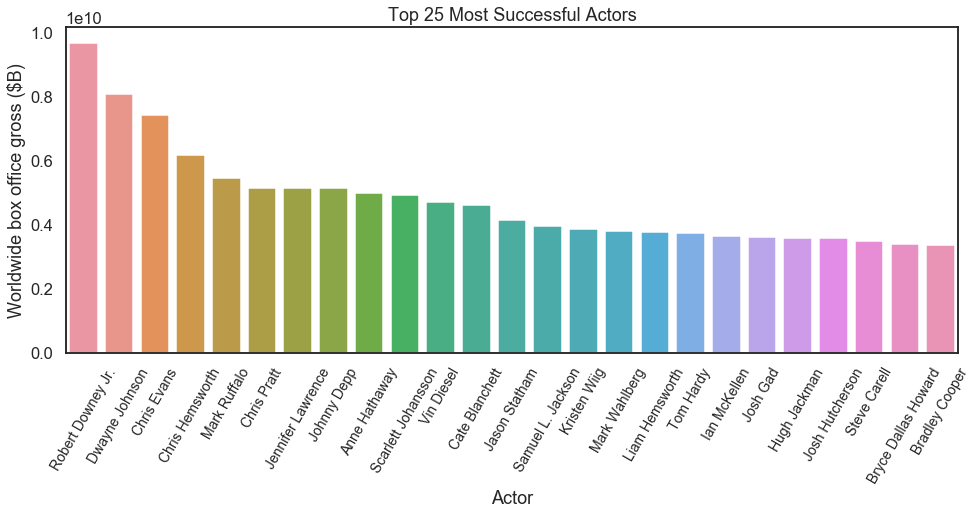

In [72]:
plt.figure(figsize=(16, 6))
sns.barplot(actors.index,actors.worldwide_gross)
sns.set_style("white")
sns.set_context("talk")
plt.xlabel('Actor')
plt.ylabel('Worldwide box office gross ($B)')
plt.xticks(rotation=60,fontsize = 14)
plt.title('Top 25 Most Successful Actors')
